In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

In [2]:
data = pd.read_csv("../processing/merged_data.csv", index_col=[0])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,componentindex_249.0,componentindex_251.0,time_point,infection_status,gut_section_AM,gut_section_H,gut_section_PM,R.prolixus_starved,T.cruzi_epi,T.cruzi_tryp
1.0,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2.0,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
3.0,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4.0,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
5.0,0,1,1,1,0,0,0,1,1,1,...,0,1,0,0,0,0,1,0,0,1


In [3]:
shuffled_rows = np.random.permutation(data.index)
shuffled_data = data.loc[shuffled_rows]

split_index = round(0.8*(len(shuffled_data)))
train = shuffled_data[:split_index]
test = shuffled_data[split_index:]

In [4]:
rf_train_X = train.drop(['infection_status'],axis=1)
rf_train_y = train['infection_status']

In [5]:
hyperparameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": [2, 5, 10, 20],
    "max_features": ["log2", "sqrt"],
    "min_samples_leaf": [2, 5, 10],
    "min_samples_split": [2, 3, 4],
    "n_estimators": [50, 100, 500]
}

rf= RandomForestClassifier(random_state=1)
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)
grid.fit(rf_train_X, rf_train_y)
best_params = grid.best_params_
best_score = grid.best_score_
print(best_params, best_score)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500} 0.95375


In [6]:
from sklearn import metrics
rf_test_X = test.drop(['infection_status'], axis =1)
rf_test_y = test['infection_status']
rf= RandomForestClassifier(random_state=1,criterion= 'entropy', max_depth= 20, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 500)
rf.fit(rf_train_X, rf_train_y)
test_predictions = rf.predict(rf_test_X)
test_accuracy = metrics.accuracy_score(test_predictions,rf_test_y)

train_predict = rf.predict(rf_train_X)
train_acc = metrics.accuracy_score(train_predict,rf_train_y)
print(test_accuracy)
print(train_acc)

0.95
1.0


In [13]:
importance = rf.feature_importances_
# summarize feature importance
feats = list(rf_train_X.columns)
for feature in zip(feats, importance):
    print('Feature:', feature[0]+',', 'Score:', feature[1])
    


Feature: 0, Score: 0.00040647986934371676
Feature: 1, Score: 0.0009229981725292222
Feature: 2, Score: 0.0008562306079149141
Feature: 3, Score: 0.0010366321101799407
Feature: 4, Score: 0.00014316599509111197
Feature: 5, Score: 0.0008230102120804144
Feature: 6, Score: 0.0003136306918385419
Feature: 7, Score: 0.0
Feature: 8, Score: 0.0006139829216095336
Feature: 9, Score: 0.0010919220874331995
Feature: 10, Score: 0.0010431999359404435
Feature: 11, Score: 0.0006324482632990402
Feature: 12, Score: 0.0018682489667063925
Feature: 13, Score: 0.0015528825073777245
Feature: 14, Score: 0.0007578309958259088
Feature: 15, Score: 0.0
Feature: 16, Score: 0.0014481921402271704
Feature: 17, Score: 0.0002155392184902895
Feature: 18, Score: 0.004108236429627826
Feature: 19, Score: 0.004137133773157295
Feature: 20, Score: 0.003262407837777962
Feature: 21, Score: 0.003603951359109953
Feature: 22, Score: 0.00018566901871983228
Feature: 23, Score: 0.00026483315392501836
Feature: 24, Score: 0.0004911472215311

Feature: 529, Score: 0.00030334170238016547
Feature: 530, Score: 0.0011930879625792136
Feature: 531, Score: 0.000681110584859037
Feature: 532, Score: 0.0002612346279569345
Feature: 533, Score: 0.0007052083625026384
Feature: 534, Score: 0.0005412415740487236
Feature: 535, Score: 0.0008060756133403468
Feature: 536, Score: 0.0010205210484833323
Feature: 537, Score: 0.00040370249471828964
Feature: 538, Score: 0.003941177596175701
Feature: 539, Score: 0.001415723248853018
Feature: 540, Score: 0.00092312357316439
Feature: 541, Score: 0.0014352567647846596
Feature: 542, Score: 0.0004806482198124273
Feature: 543, Score: 0.0006129967476277701
Feature: 544, Score: 0.0
Feature: 545, Score: 0.0004708331957612071
Feature: 546, Score: 0.0
Feature: 547, Score: 0.00028991777806829387
Feature: 548, Score: 0.0009620959002966715
Feature: 549, Score: 0.0005969611077765548
Feature: 550, Score: 0.0020157464253510297
Feature: 551, Score: 0.0004978972622578048
Feature: 552, Score: 0.0
Feature: 553, Score: 0.0

Feature: 1029, Score: 0.0006887555261185418
Feature: 1030, Score: 3.4863031481673566e-05
Feature: 1031, Score: 0.0014984708005739572
Feature: 1032, Score: 9.36951792754237e-05
Feature: 1033, Score: 5.390170293425826e-05
Feature: 1034, Score: 0.0019382413074856709
Feature: 1035, Score: 0.00032298781369928965
Feature: 1036, Score: 0.000615745796104322
Feature: 1037, Score: 0.002723598602177903
Feature: 1038, Score: 0.0018713209273588229
Feature: 1039, Score: 0.002027756495498061
Feature: 1040, Score: 0.0005176255098878204
Feature: 1041, Score: 6.391569770741745e-05
Feature: 1042, Score: 0.0002823108178631287
Feature: 1043, Score: 0.001395923248597414
Feature: 1044, Score: 0.00149749993169103
Feature: 1045, Score: 0.00015206394843758224
Feature: 1046, Score: 9.412266651727645e-05
Feature: 1047, Score: 5.911699463722472e-05
Feature: 1048, Score: 0.0002994273824134658
Feature: 1049, Score: 0.0
Feature: 1050, Score: 0.0
Feature: 1051, Score: 0.0
Feature: 1052, Score: 0.0
Feature: 1053, Score

Feature: componentindex_169.0, Score: 7.182229667694822e-05
Feature: componentindex_170.0, Score: 0.0007909573336532886
Feature: componentindex_171.0, Score: 0.0007134143843150163
Feature: componentindex_173.0, Score: 0.000675383495204866
Feature: componentindex_174.0, Score: 0.00035968664805991195
Feature: componentindex_177.0, Score: 0.0002264571779150156
Feature: componentindex_181.0, Score: 5.567830498500939e-06
Feature: componentindex_195.0, Score: 0.002679633349214953
Feature: componentindex_196.0, Score: 0.00045140383606783705
Feature: componentindex_200.0, Score: 0.0002818298181430472
Feature: componentindex_202.0, Score: 0.0009455716015965734
Feature: componentindex_205.0, Score: 0.00038745799476090837
Feature: componentindex_208.0, Score: 0.0061482033900356
Feature: componentindex_211.0, Score: 0.0025201031415434598
Feature: componentindex_220.0, Score: 8.28645589828396e-05
Feature: componentindex_228.0, Score: 0.00038892977181150635
Feature: componentindex_238.0, Score: 0.00

<BarContainer object of 1556 artists>

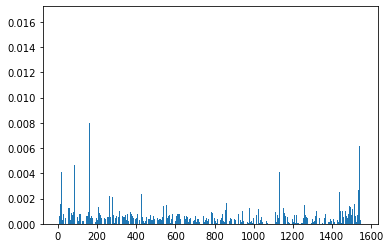

In [16]:
plt.bar([x for x in range(len(importance))], importance)

